# `morphon` usage examples

In [1]:
import morphon

Load morphology file [in.swc](./in.swc)

In [2]:
m = morphon.Morpho('in.swc')

Do basic morphometric analysis

In [5]:
metrics = morphon.measure(m)

In [8]:
import pandas
pandas.DataFrame(metrics)

,apic,axon,dend,soma
area,8784.52,2596.68,5811.05,577.149
bifurcations,54,36,29,1
branches,109,74,62,3
diameter effective,0.340595,0.356514,0.366297,13.5566
diameters,"(0.32276867031, 0.137803426567, 0.3, 2.9)","(0.3, 5.55111512313e-17, 0.3, 0.3)","(0.308854166667, 0.0643455805214, 0.3, 1.2)","(13.5566, 1.7763568394e-15, 13.5566, 13.5566)"
extent euclidean,"[455.23, 731.8, 244.43]","[603.13, 252.91, 142.03]","[314.42, 249.0, 136.82]","[0.92, 13.52, 0.08]"
extent path,853.515,885.807,273.955,6.77575
extent radial,778.791,372.336,256.379,6.77575
length,8209.76,2318.41,5049.77,13.5515
order,23,11,6,1


Plot the cell.

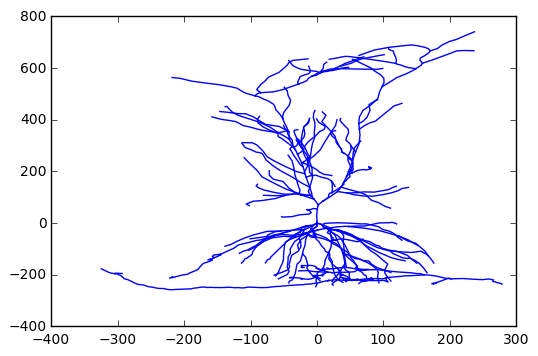

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot()
morphon.plot(m, ax)

Plot cell projections.

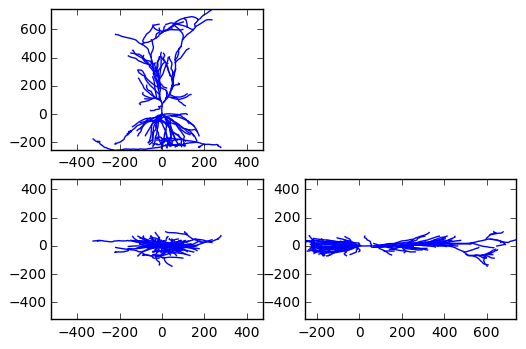

In [33]:
fig = plt.figure()
ax = plt.subplot(2, 2, 1)
morphon.plot(m, ax, projection='xy', equal_scales=True)
ax = plt.subplot(2, 2, 3)
morphon.plot(m, ax, projection='xz', equal_scales=True)
ax = plt.subplot(2, 2, 4)
morphon.plot(m, ax, projection='yz', equal_scales=True)

Make a colorful plot to distinguish different types of neurites.

In [25]:
neurites = set(m.neurite(i) for i in m.traverse())
colors = {'soma': 'black', 'dend': 'blue', 'apic': 'green', 'axon': 'red'}
thickness = {'soma': 5, 'dend': 1, 'apic': 1, 'axon': 0.5}

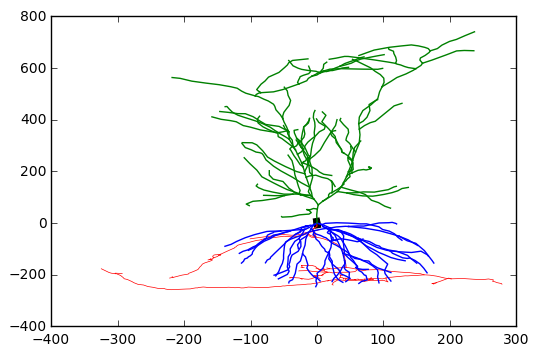

In [36]:
fig = plt.figure()
ax = plt.subplot()

for neurite in neurites:
    morphon.plot(m, ax, neurites=[neurite], 
                 color=colors[neurite], 
                 linewidth=thickness[neurite])

Do the same but in 3D.

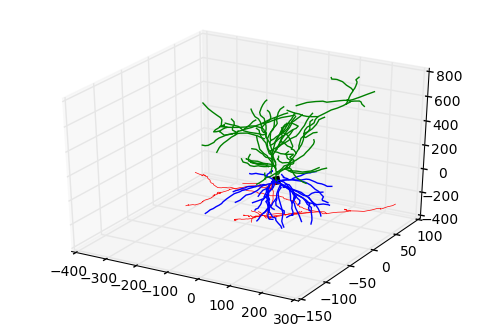

In [30]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

for neurite in neurites:
    morphon.plot(m, ax, projection='3d',
                 neurites=[neurite], 
                 color=colors[neurite], 
                 linewidth=thickness[neurite])

Build the Scholl diagram.

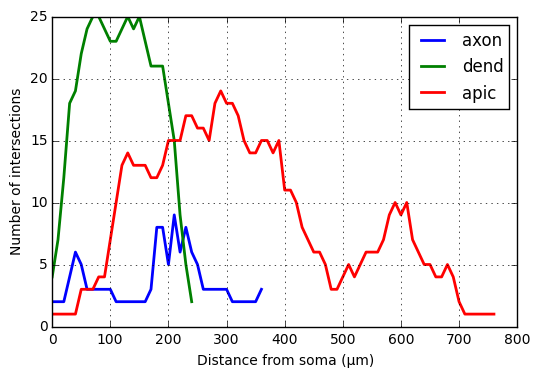

In [40]:
fig = plt.figure()
ax = plt.subplot()
ax.set_xlabel(u'Distance from soma (μm)')
ax.set_ylabel('Number of intersections')
for neurite in neurites:
    if neurite is 'soma': continue
    r, x = morphon.scholl(m, neurite, h=10)
    plt.plot(r, x, label=neurite, lw=2)
plt.legend()
plt.grid(True)